In [51]:
from __future__ import print_function
import os
#libraries
import numpy as np
import pandas as pd
import python_speech_features
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [52]:
#加载数据

sampling_rate = 1600

def load_data(path = None):


    if path == None:
        path = '../data/wav'

    files = os.listdir(path)

    sample = []
    for file in files:
        sample.append([path+'/'+file,file[0:2],file[2:5],file[5]])
    samples = pd.DataFrame(sample,columns=['audio_name','actor','text','emotion'])

    emotions = ["A",'E','F','L','W','T','N']
    emotions_english = ["anxiety",'disgust','happy','boredom','anger','sadness','neutral']
    #mapping = {'A': 0, 'E': 1, 'F':2, 'L':3, 'W':4, 'T':5, 'N':6}
    mapping = {'A': 'anxiety', 'E': 'disgust', 'F':'happy', 'L':'boredom', 'W':'anger', 'T':'sadness', 'N':'neutral'}
    samples = samples.replace({'emotion':mapping})

    return samples,emotions_english

In [53]:
samples,emotion= load_data(path = "data/wav")
samples

,audio_name,actor,text,emotion
0,data/wav/03a01Fa.wav,03,a01,happy
1,data/wav/03a01Nc.wav,03,a01,neutral
2,data/wav/03a01Wa.wav,03,a01,anger
3,data/wav/03a02Fc.wav,03,a02,happy
4,data/wav/03a02Nc.wav,03,a02,neutral
...,...,...,...,...
530,data/wav/16b10Lb.wav,16,b10,boredom
531,data/wav/16b10Tb.wav,16,b10,sadness
532,data/wav/16b10Td.wav,16,b10,sadness
533,data/wav/16b10Wa.wav,16,b10,anger


In [54]:
def import_wave_wrapper(df , modify = True):

    Y = []
    SR = []
    l = []

    for i in range(len(df)):
        y,sr = librosa.load(df["audio_name"][i],sr=None)
        Y.append(y)
        l.append(len(y))

    if modify:
        df["sound"] = Y
        df["length"] = l
    else:
        return Y,l
    
import_wave_wrapper(samples)

In [55]:
def silence_size(y,size = 2, threshold = 0.01):

    coord = []
    size = 5
    for i in range(size,len(y)-size):
        if np.max(abs(y[i-size:i+size])) < threshold:
            coord.append(i)

    return len(coord)


In [56]:
def ratio(df,threshold = 0.02, modify = True):

    ratios = []

    for i in range(len(df)):
        sound = df["sound"][i]
        s = silence_size(sound)
        l = len(sound)
        ratio = s/(l-s)
        ratios.append(ratio)

    if modify:
        df["ratio"] = ratios
    else:
        return ratios

In [57]:
def extract_feature(df,f, name, modify = True):

    mean = []
    sd = []
    median = []
    maxi = []
    mini = []

    for i in range(len(df)):
        #extract the data
        audio_data = df["sound"][i]
        sr = 1600
        inter = f(y=audio_data,sr=sr)
        
        #compute the actual statistics
        mean.append(np.mean(inter))
        sd.append(np.std(inter))
        median.append(np.median(inter))
        maxi.append(np.max(inter))
        mini.append(np.min(inter))

    if modify:
        df[name +"_mean"] = mean
        df[name +"_sd"] = sd
        df[name +"_median"] = median
        df[name +"_max"] = maxi
        df[name + "_min"] = mini
    else: return mean,sd,median,maxi,mini

In [60]:
#librosa提取特征
extract_feature(samples, librosa.feature.mfcc, "mfcc")
extract_feature(samples, librosa.feature.spectral_centroid, "spectral_centroid")
extract_feature(samples, librosa.feature.spectral_rolloff, "spectral_rolloff")
#extract_feature(samples, python_speech_features.logfbank , "logfbank")
#extract_feature(samples, python_speech_features.ssc, "spectral_subband_centroid")
ratio(samples)

In [61]:
samples

,audio_name,actor,text,emotion,sound,length,mfcc_mean,mfcc_sd,mfcc_median,mfcc_max,...,spectral_centroid_sd,spectral_centroid_median,spectral_centroid_max,spectral_centroid_min,spectral_rolloff_mean,spectral_rolloff_sd,spectral_rolloff_median,spectral_rolloff_max,spectral_rolloff_min,ratio
0,data/wav/03a01Fa.wav,03,a01,happy,"[0.0006713867, 0.0030822754, 0.002532959, 0.00...",30372,-1.172593,57.300438,1.621221,181.907623,...,89.210225,157.050417,476.725433,62.553879,354.531250,151.150495,350.390625,682.81250,100.00000,0.374859
1,data/wav/03a01Nc.wav,03,a01,neutral,"[0.0002746582, 9.1552734e-05, 0.00039672852, 0...",25780,0.723597,63.534988,3.182909,207.101044,...,80.086041,119.564040,434.258920,52.470702,269.378064,127.890992,235.156250,617.18750,82.81250,0.483912
2,data/wav/03a01Wa.wav,03,a01,anger,"[0.0, 3.0517578e-05, -0.00015258789, -3.051757...",30045,-2.685353,50.471970,-1.850917,198.154938,...,78.206297,195.545950,478.417329,116.626866,394.690148,116.680203,375.781250,676.56250,221.87500,0.365496
3,data/wav/03a02Fc.wav,03,a02,happy,"[0.0007019043, 0.0025024414, 0.0026855469, -0....",32100,-1.884902,47.040218,0.934309,127.197296,...,88.073776,193.093976,527.604059,75.963219,417.026290,148.140900,393.750000,731.25000,146.09375,0.388408
4,data/wav/03a02Nc.wav,03,a02,neutral,"[6.1035156e-05, -0.00030517578, -0.00015258789...",23037,3.167446,56.881504,4.570874,212.748459,...,77.735712,124.001976,435.889839,54.144284,303.680556,152.765719,289.062500,649.21875,93.75000,0.332620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,data/wav/16b10Lb.wav,16,b10,boredom,"[-6.1035156e-05, 0.00039672852, 0.0, -6.103515...",55083,0.501803,48.499928,2.054758,168.730591,...,84.056895,189.294050,517.530152,71.927788,407.523148,122.245983,389.062500,707.81250,96.09375,0.170360
531,data/wav/16b10Tb.wav,16,b10,sadness,"[-0.007843018, -0.00869751, -0.009002686, -0.0...",56010,1.926909,46.549118,4.830203,136.713348,...,98.078149,192.480471,608.105860,83.924851,421.889205,138.598241,420.312500,761.71875,146.09375,0.264363
532,data/wav/16b10Td.wav,16,b10,sadness,"[0.010803223, 0.011566162, 0.009246826, 0.0110...",62947,1.100149,50.948414,5.464984,133.085037,...,86.628220,178.897092,546.091665,74.498635,420.490346,112.055426,417.187500,726.56250,156.25000,0.268198
533,data/wav/16b10Wa.wav,16,b10,anger,"[0.00030517578, 0.000579834, -0.00045776367, -...",38626,-10.704136,60.431591,-3.705884,133.142426,...,50.752693,246.206610,418.497055,119.368575,449.218750,59.468930,438.281250,695.31250,342.18750,0.384742


In [62]:
samples.to_csv("features/berlin_features.csv",index=False)
import_wave_wrapper(samples)

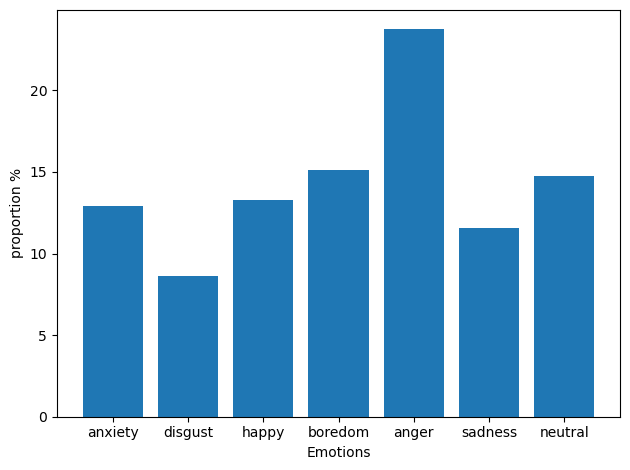

In [63]:
proportion = []
total = len(samples.index)
for e in emotion:
    proportion.append(100*len(samples[samples["emotion"]==e].index)/total)
    

x = np.arange(7)

fig, ax = plt.subplots()
plt.bar(x, proportion)
plt.xticks(x, emotion)
plt.xlabel("Emotions")
plt.ylabel("proportion %")
plt.tight_layout()
plt.savefig('results/proportion.png',dpi = 1000)
plt.show()

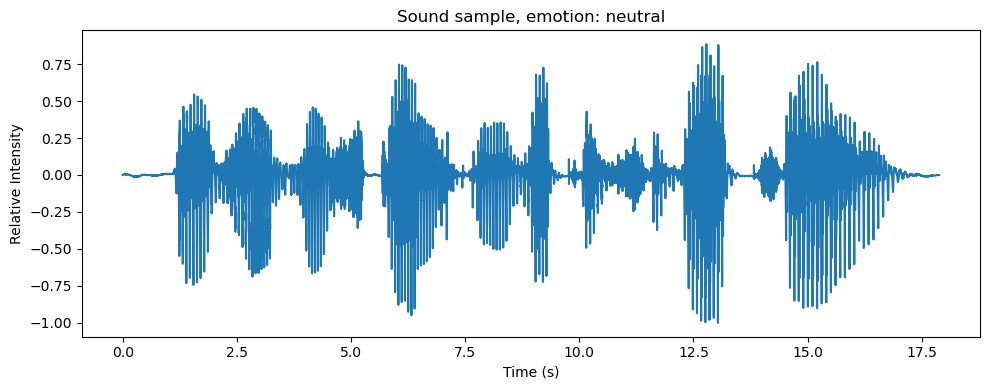

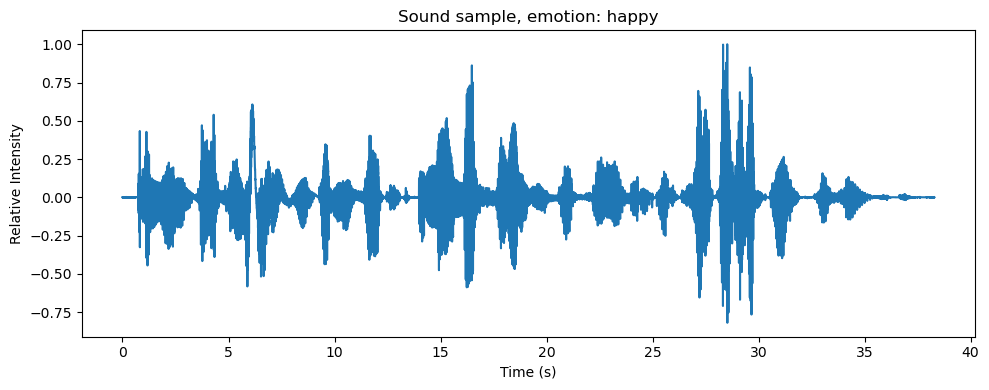

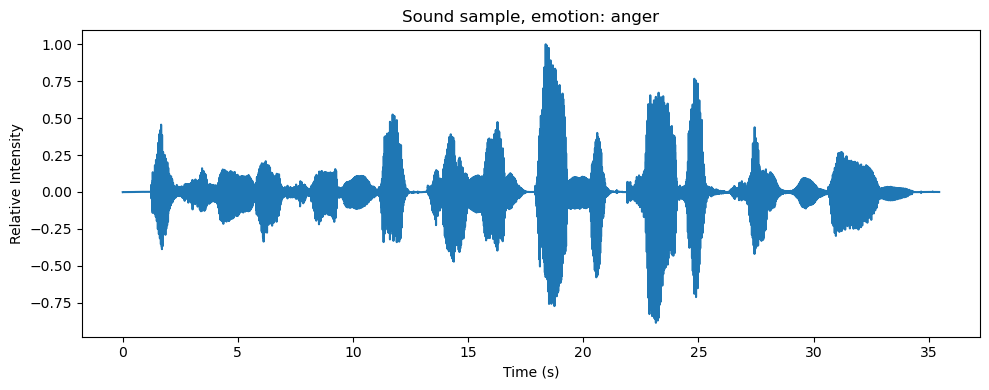

In [67]:
import matplotlib.pyplot as plt
import numpy as np

def custom_waveplot(y, sr, title="Waveform", ylabel="Relative Intensity", save_path=None):
    plt.figure(figsize=(10, 4))
    plt.plot(np.arange(len(y)) / sr, y)
    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=100)
    else:
        plt.show()

i =23
y = samples["sound"][i]
custom_waveplot(y, 1600, title="Sound sample, emotion: {}".format(samples["emotion"][i]))


i = 225
y = samples["sound"][i]
custom_waveplot(y, 1600, title="Sound sample, emotion: {}".format(samples["emotion"][i]))



i = 400
y = samples["sound"][i]
custom_waveplot(y, 1600, title="Sound sample, emotion: {}".format(samples["emotion"][i]))
